# tBlaze stability

One of the important measures for the success of this project is the [stability](https://www.nap.edu/read/10308/chapter/4)
of the rover as it is traversing the ground, around corners, picking up the load from the ground and putting the load back
on the ground.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from robot_functions import *
from crate_rover_specs import *

rover_specs = RoverSpecification()
rover = Rover(rover_specs)

## Static stability

Static stability refers to the potential for the vehicle to roll over, either side ways or front-to-back. This provides
a measure for the angle of a slope the rover can traverse without rolling over.

The static stability can be [calculated](file:///C:/Users/PETRIK~1.AD-/AppData/Local/Temp/the-static-stability-factor-a-dynamic-introduction-to-engineering.pdf)
using the following formula:

```
    roll_angle = atan( T / H )
```

Where `H` is the height of the center of gravity and `T` is the horizontal distance, between the center of gravity and
the wheel contact points. In order to calculate side-to-side roll angle `T` is the distance measured along the width of
the rover. In order to calculate the front-to-back roll angle `T` is the distance measured along the length of the rover.

For the current rover dimesions and weights the roll-over angles are:

In [2]:
# Static stability
chassis_cog = rover_specs.chassis.center_of_gravity()
rover_cog = rover.center_of_gravity()

rover_no_load_side_to_side_roll_over_angle = 180 / math.pi * math.atan(chassis_cog.y / chassis_cog.z)
print('Roll-over angle')
print(f'Side to Side [No Load]\t{rover_no_load_side_to_side_roll_over_angle}')

rover_load_side_to_side_roll_over_angle = 180 / math.pi * math.atan(rover_cog.y / rover_cog.z)
print(f'Side to Side [Load]\t{rover_load_side_to_side_roll_over_angle}')

rover_no_load_front_to_back_roll_over_angle = 180 / math.pi * math.atan(chassis_cog.x / chassis_cog.z)
print(f'Front to Back [No Load]\t{rover_no_load_front_to_back_roll_over_angle}')

rover_load_front_to_back_roll_over_angle = 180 / math.pi * math.atan(rover_cog.x / rover_cog.z)
print(f'Front to Back [Load]\t{rover_load_front_to_back_roll_over_angle}')

Roll-over angle
Side to Side [No Load]	48.81407483429035
Side to Side [Load]	26.81272591469255
Front to Back [No Load]	59.743562836470744
Front to Back [Load]	37.166593506863286


## Dynamic stability

Dynamic stability the resistance to roll over caused by taking a corner at a given velocity.

The minimum radius that the rover can take at a given speed and slope angle can be
[calculated](file:///C:/Users/PETRIK~1.AD-/AppData/Local/Temp/the-static-stability-factor-a-dynamic-introduction-to-engineering.pdf)
using the following formula:

```
    radius = (v^2) / g * ((T / H) * tan(slope) + 1) / ((T / H) - tan(slope))
```

Where `v` is the velocity of the rover, `g` is the gravitational acceleration and `slope` is the
angle of the slope in radians.

For the current rover dimensions and weights the minimum corner radius achievable without rolling over
is given by the following graphs:

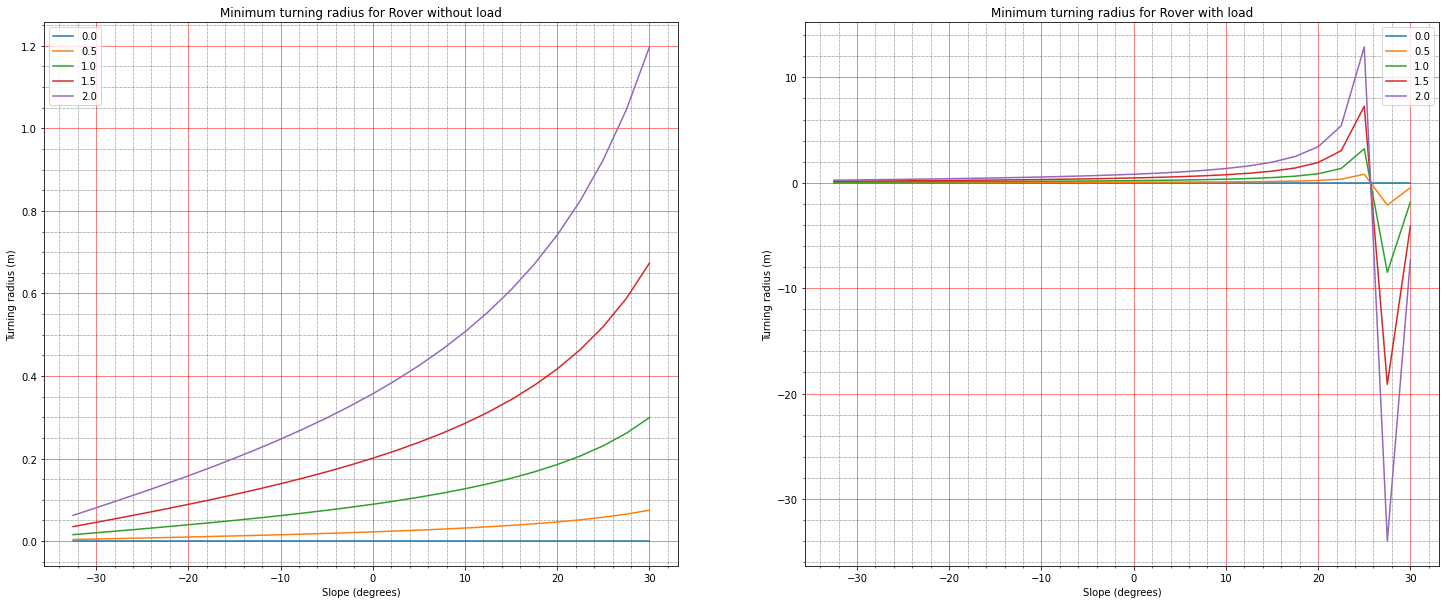

In [3]:
# Dynamic stability

radiusses_without_load = []
radiusses_with_load = []

columns = ['slope']

slope_step = 2.5
maximum_slope = rover_specs.performance.maximum_slope_angle_without_load() + slope_step
for slope in np.arange(-maximum_slope, maximum_slope, slope_step):

    radia_without_load = [ slope ]
    radia_with_load = [ slope ]

    velocity_step = 0.5
    for velocity in np.arange(0.0, rover_specs.performance.maximum_velocity_on_flat_ground() + velocity_step,
                            velocity_step):

        velocity_as_text = str(velocity)
        if velocity_as_text not in columns:
            columns.append(velocity_as_text)

        radius_no_load = rover.corner_radius_for_velocity_and_angle(velocity, chassis_cog.y, chassis_cog.z, slope)
        radia_without_load.append(radius_no_load)
        
        radius_load = rover.corner_radius_for_velocity_and_angle(velocity, rover_cog.y, rover_cog.z, slope)
        radia_with_load.append(radius_load)

    radiusses_without_load.append(radia_without_load)
    radiusses_with_load.append(radia_with_load)

radiusses_without_load_df = pd.DataFrame(radiusses_without_load, columns=columns)
radiusses_with_load_df = pd.DataFrame(radiusses_with_load, columns=columns)

fig, ax_group = plt.subplots(1, 2, figsize=(25, 10), sharex=False)

# unpack all the axes subplots
axs = ax_group.ravel()

radiusses_without_load_df.plot(x='slope', ax=axs[0])
axs[0].set_title('Minimum turning radius for Rover without load')
axs[0].set_xlabel('Slope (degrees)')
axs[0].set_ylabel('Turning radius (m)')
axs[0].set_axisbelow(True)
axs[0].minorticks_on()
axs[0].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

radiusses_with_load_df.plot(x='slope', ax=axs[1])
axs[1].set_title('Minimum turning radius for Rover with load')
axs[1].set_xlabel('Slope (degrees)')
axs[1].set_ylabel('Turning radius (m)')
axs[1].set_axisbelow(True)
axs[1].minorticks_on()
axs[1].grid(which='major', linestyle='-', linewidth='0.5', color='red')
axs[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')